In [1]:
import pickle as pkl
import numpy as np
from matplotlib import pyplot as plt

with open('wafer_dict.pkl','rb') as f:
    wafer_dict = pkl.load(f)


12708


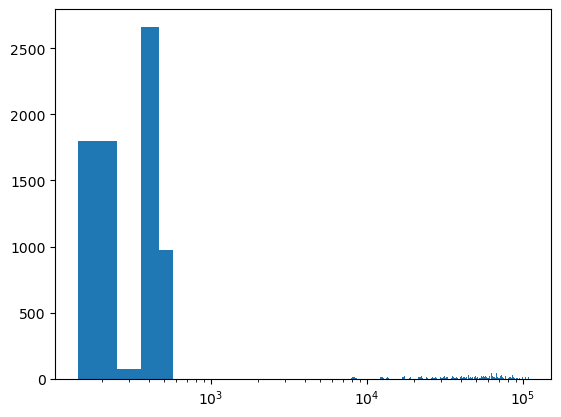

In [2]:
#goal 1 
goal1_dist = []



for pixel in wafer_dict.keys():
    same_pixel_pad_x = []
    same_pixel_pad_y = []
    for detector in wafer_dict[pixel].keys():
        for Polarity in wafer_dict[pixel][detector].keys():
            same_pixel_pad_x.append(wafer_dict[pixel][detector][Polarity]['Pad X center'])
            same_pixel_pad_y.append(wafer_dict[pixel][detector][Polarity]['Pad Y center'])

    for i in range(len(same_pixel_pad_x)):
        for j in range(i+1, len(same_pixel_pad_x)):
            dist_x = same_pixel_pad_x[i] - same_pixel_pad_x[j]
            dist_y = same_pixel_pad_y[i] - same_pixel_pad_y[j]
            dist = np.sqrt(dist_x**2 + dist_y**2)
            goal1_dist.append(dist)

print(len(goal1_dist))    
                
plt.hist(goal1_dist, bins = 1000)        
plt.xscale('log')
plt.show()

     

3528
3528 max is 61122.58203949385 min is 0.0


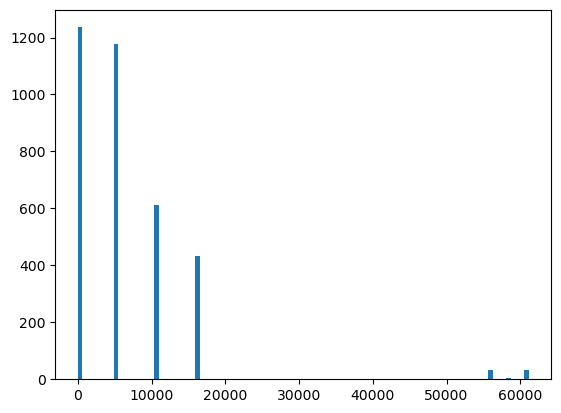

In [10]:
# goal 2

goal2_dist = []

group_A = {}
group_B = {}
group_C = {}


for pixel in wafer_dict.keys():
    if "A" in pixel:
        group_A[pixel] = wafer_dict[pixel]
    elif "B" in pixel:
        group_B[pixel] = wafer_dict[pixel]
    elif "C" in pixel:
        group_C[pixel] = wafer_dict[pixel]

# def list_to_nested_dict(sorted_list):
#     """Initialize an empty dictionary.
# Iterate over the sorted list.
# For each item in the list, extract the keys (pixel, pad_type, polarity) and the details.
# Use these keys to reconstruct the nested dictionary structure."""
#     nested_dict = {}
#     for keys, details in sorted_list:
#         pixel, pad_type, polarity = keys
#         if pixel not in nested_dict:
#             nested_dict[pixel] = {}
#         if pad_type not in nested_dict[pixel]:
#             nested_dict[pixel][pad_type] = {}
#         nested_dict[pixel][pad_type][polarity] = details
#     return nested_dict

def sorted_dict(group,sorted_by,give_reverse = True):
    """Flatten the dictionary structure to a list of tuples, where each tuple contains the full path to the pad (including Pixel, B0/T0/X0/R0/L0, and + or -) and the pad's details.
Sort this list of tuples based on the "Pad X center" value found in the pad's details.
Optionally, restructure the sorted list back into a dictionary format if needed."""
    flat_list = []
    for pixel, pixel_data in group.items():
        for pad_type, pad_data in pixel_data.items():
            for polarity, details in pad_data.items():
                flat_list.append(((pixel, pad_type, polarity), details))
    sorted_list = sorted(flat_list, key = lambda x: x[1][sorted_by], reverse = give_reverse)
    #dict = list_to_nested_dict(sorted_list)
    return sorted_list

# for group A, sort by pad x increasing
# for group B, sort by pad y decreasing
# for group A, sort by pad x decreasing
sorted_group_A = sorted_dict(group_A,sorted_by='Pad X center',give_reverse=False)
sorted_group_B = sorted_dict(group_B,sorted_by='Pad Y center',give_reverse=True)
sorted_group_C = sorted_dict(group_C,sorted_by='Pad X center',give_reverse=True)

reordered_dict = sorted_group_A + sorted_group_B + sorted_group_C

print(len(reordered_dict))


for i in range(len(reordered_dict)):
        if i+1 < len(reordered_dict):
            pixel_x_distance = reordered_dict[i][1]['Pixel X center'] \
                                - reordered_dict[i+1][1]['Pixel X center']
            pixel_y_distance = reordered_dict[i][1]['Pixel Y center'] \
                                - reordered_dict[i+1][1]['Pixel Y center']
            distance = np.sqrt((pixel_x_distance)**2 + (pixel_y_distance)**2)            
            
        elif i+1 == len(reordered_dict):
            pixel_x_distance = reordered_dict[i][1]['Pixel X center'] \
                                - reordered_dict[0][1]['Pixel X center']
            pixel_y_distance = reordered_dict[i][1]['Pixel Y center'] \
                                - reordered_dict[0][1]['Pixel Y center']
            distance = np.sqrt((pixel_x_distance)**2 + (pixel_y_distance)**2)
        goal2_dist.append(distance)

print(len(goal2_dist),f"max is {max(goal2_dist)}",f"min is {min(goal2_dist)}")
plt.hist(goal2_dist, bins = 100)
#plt.xscale('log')
plt.show()
